In [1]:
import os
import sys
sys.path.append((os.path.join(r'C:\Users\AA2-PC2\Software\NI-experiment-control - Atom Array\nistreamer')))

from nistreamer.streamer import NIStreamer
from nistreamer.utils import iplot, RendOption

In [2]:
streamer = NIStreamer()

In [3]:
ao_card = streamer.add_ao_card(max_name='Dev2', samp_rate=1e6)
print(ao_card)

AO card Dev2
	Sample clock: Using 1,000,000.0 Hz onboard sample clock
	Start trigger: Not using external start trigger
	Reference clock: Not using external reference clock


In [4]:
do_card = streamer.add_do_card(max_name='Dev3', samp_rate=10e6)
print(do_card)

DO card Dev3
	Sample clock: Using 10,000,000.0 Hz onboard sample clock
	Start trigger: Not using external start trigger
	Reference clock: Not using external reference clock


In [5]:
streamer.reset_all()

In [6]:
ao_chan = ao_card.add_chan(chan_idx=0, default_value=0, nickname='ao0')
do_chan = do_card.add_chan(chan_idx=0, nickname='do0')

### General test

In [8]:
ao_chan.clear_edit_cache()

ao_chan.sine(t=1, dur=1, amp=0.1, freq=1.234)
ao_chan.sine(t=3, dur=1, amp=0.2, freq=1.234, keep_val=True)

ao_chan.go_sine(t=5, amp=0.3, freq=1.234)

ao_chan.sine(t=6, dur=1, amp=0.4, freq=1.234, keep_val=True)
ao_chan.sine(t=7, dur=1, amp=0.5, freq=1.234, keep_val=True)

ao_chan.sine(t=9, dur=1, amp=0.6, freq=1.234, keep_val=False)
ao_chan.sine(t=10, dur=2, amp=0.6, freq=1.234, keep_val=False)

ao_chan.go_constant(t=12, val=-0.5)

ao_chan.sine(t=14, dur=1, amp=0.7, freq=1.234, keep_val=True)
# my_chan.go_sine(t=14, amp=0.7, freq=1.234)

streamer.add_reset_tick(t=16)
# streamer.compile(t=16) 
streamer.compile() 

16.000002

In [26]:
iplot(chan_list=[ao_chan], nsamps=1e5)

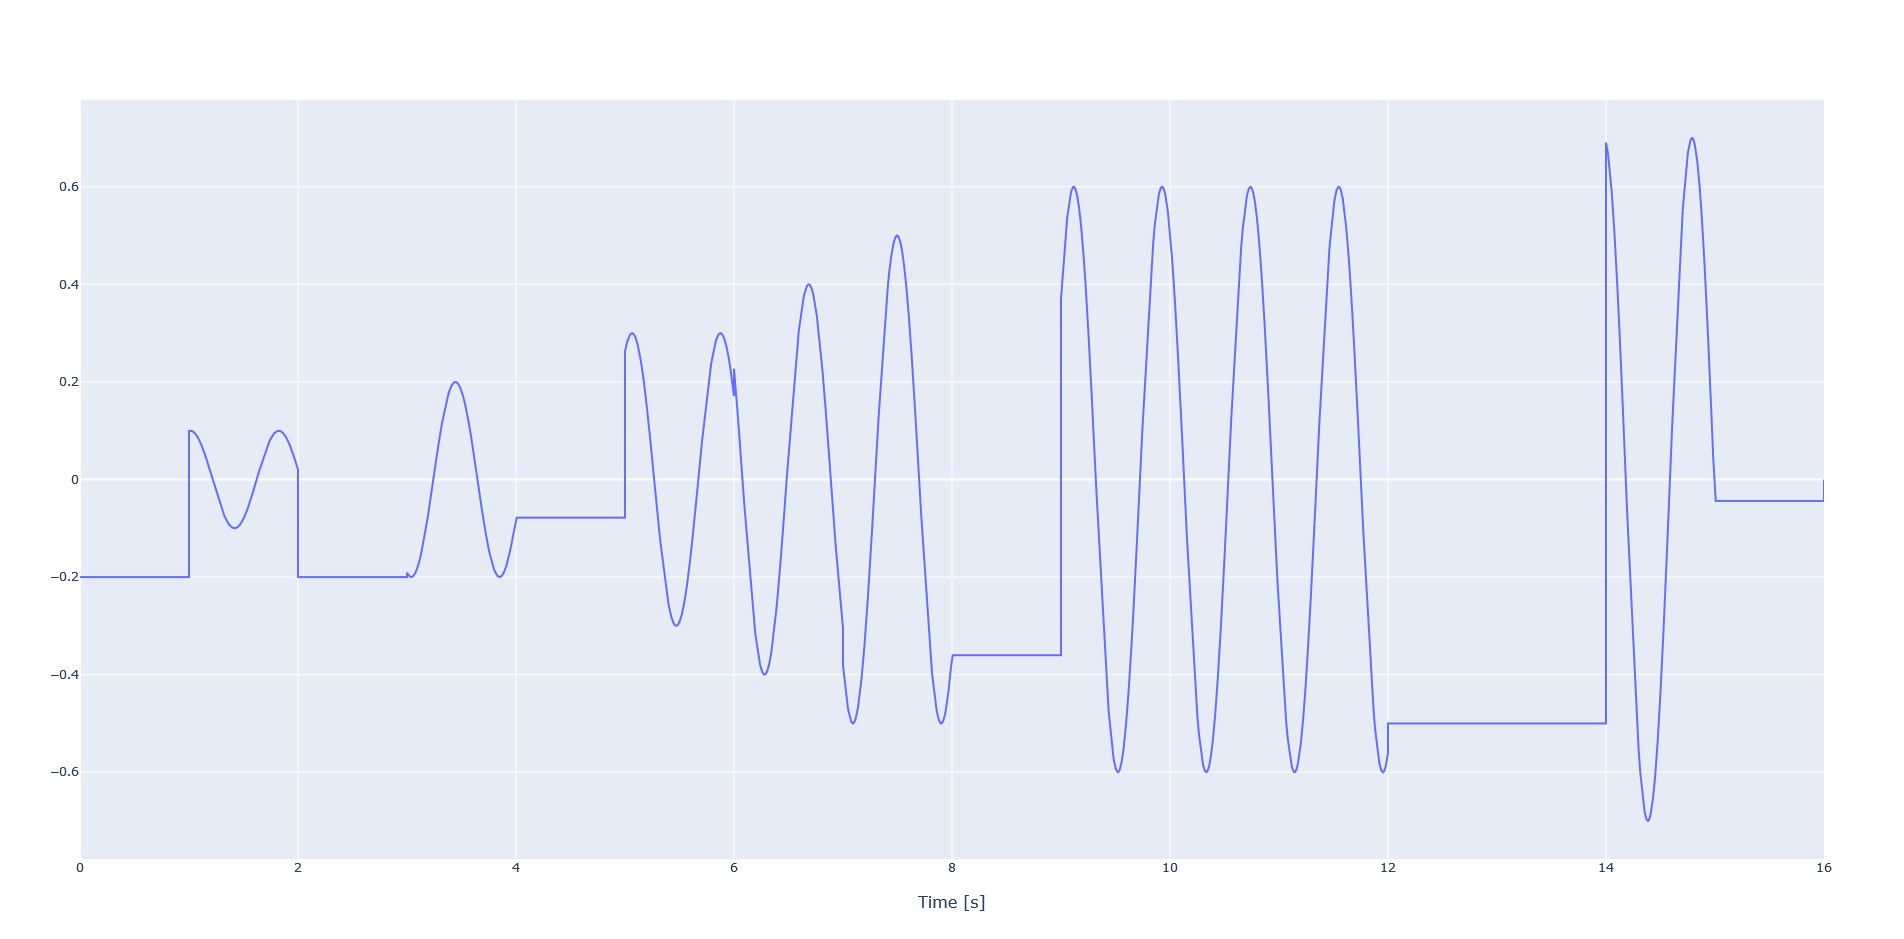

Tests on the scope (since currently `iplot()` does not show tail untill `stop_time` because it automatically recompiles with `stop_time = None` truncating the tail)

In [38]:
ao_chan.clear_edit_cache()

ao_chan.sine(t=1, dur=1, amp=0.1, freq=1.234)
ao_chan.sine(t=3, dur=1, amp=0.2, freq=1.234, keep_val=True)

ao_chan.go_sine(t=5, amp=0.3, freq=1.234)

ao_chan.sine(t=6, dur=1, amp=0.4, freq=1.234, keep_val=True)
ao_chan.sine(t=7, dur=1, amp=0.5, freq=1.234, keep_val=True)

ao_chan.sine(t=9, dur=1, amp=0.6, freq=1.234, keep_val=False)
ao_chan.sine(t=10, dur=2, amp=0.6, freq=1.234, keep_val=False)

ao_chan.go_constant(t=12, value=-0.5)

ao_chan.sine(t=14, dur=1, amp=0.7, freq=1.234, keep_val=True)
# ao_chan.go_sine(t=14, amp=0.7, freq=1.234)

streamer.add_reset_tick(15)
# streamer.compile(15)
streamer.stream_exp()

### Stress-test: back-to-back instructions

Original test

In [7]:
streamer.clear_edit_cache()

total_dur = 100.0
instr_dur = 10e-3  # + 0.5e-6
instr_num = int(total_dur // instr_dur)
print(f'instr_num = {instr_num}\n')

t = 0
for idx in range(instr_num):
    # print(f'Adding instruction {idx} ===============') 
    ao_chan.sine(t=t, dur=instr_dur, amp=idx/instr_num, freq=1.234e3)      
    t += instr_dur

print(f'Added all instructions. Final idx = {idx}')

streamer.add_reset_tick()

instr_num = 9999

Added all instructions. Final idx = 9998


99.99000099999999

In [8]:
iplot(chan_list=[ao_chan], nsamps=1e6)

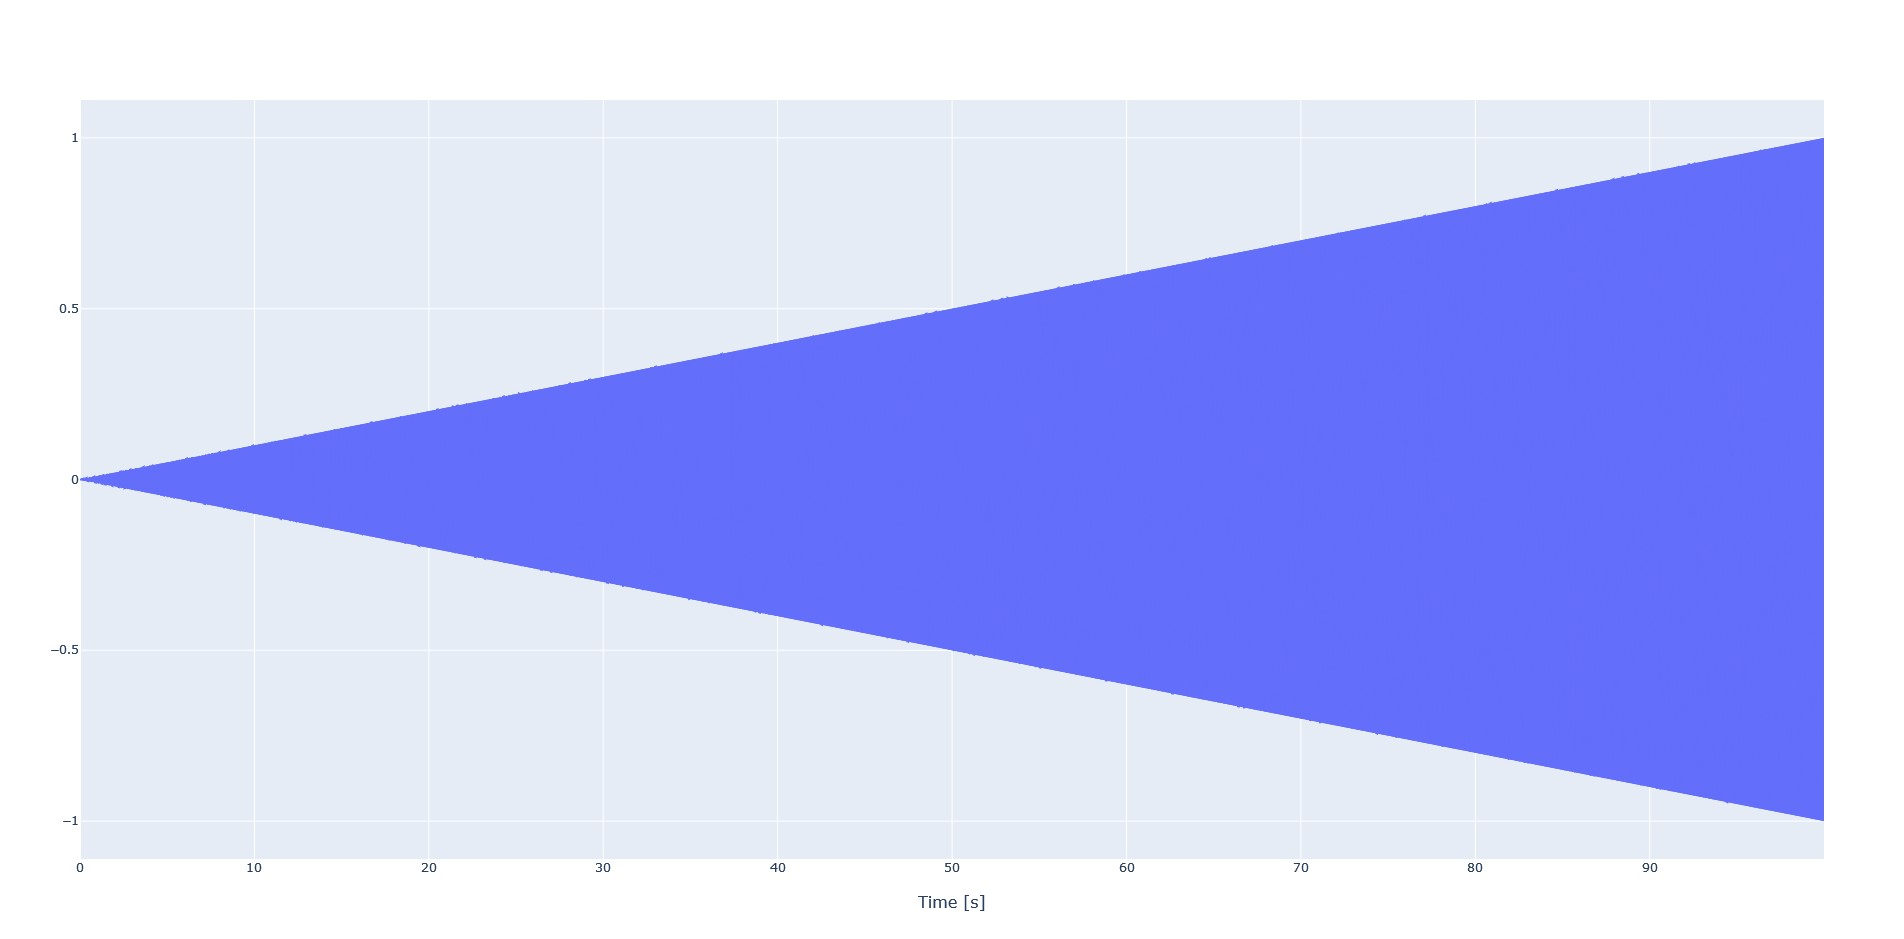

In [34]:
streamer.compile(100)
streamer.stream_exp()

Now choose pulse duration for which pulse edges fall on half-integer clock periods

In [8]:
streamer.clear_edit_cache()

total_dur = 1.50
instr_dur = 1.5e-6  # clock period is 1e-6
instr_num = int(total_dur // instr_dur)
print(f'instr_num = {instr_num}\n')

t = 0
for idx in range(instr_num):
    # print(f'Adding instruction {idx} ===============') 
    ao_chan.sine(t=t, dur=instr_dur, amp=idx/instr_num, freq=1.234e3)      
    t += instr_dur

print(f'Added all instructions. Final idx = {idx}')

instr_num = 999999

Added all instructions. Final idx = 999998


### Few-tick wide instructions

ToDo:

- insert 1, 1.5, 2-tick instructions

- check on scope for AO / DO

In [43]:
tick = 1e-6

In [69]:
ao_chan.clear_edit_cache()

ao_chan.constant(t=0, dur=tick, val=0.5)
ao_chan.constant(t=6*tick, dur=10*tick, val=0.5)

streamer.compile()
streamer.stream_exp()

In [10]:
iplot(chan_list=[ao_chan])

**[Photo 2]**

In [73]:
import time

for _ in range(5):
    for i in range(1, 8):
        ao_chan.clear_edit_cache()

        ao_chan.constant(t=0, dur=tick, val=0.5)
        ao_chan.constant(t=i*tick, dur=tick, val=0.5)

        streamer.compile(10*tick)
        streamer.stream_exp()
        time.sleep(2)

**[Photo 3]**

In [51]:
streamer.stream_exp()

In [27]:
tick = 1 / 10e6
do_chan.clear_edit_cache()

do_chan.high(t=0, dur=3*tick)

streamer.compile()
streamer.stream_exp()

**[Video 1]**

In [36]:
import time
tick = 1 / 10e6

for n in range(1, 11):
    do_chan.clear_edit_cache()

    do_chan.high(t=0, dur=n*tick)

    streamer.compile()
    streamer.stream_exp()
    
    time.sleep(2)

**[Video 2]**

In [37]:
import time
tick = 1 / 10e6

for n in range(1, 11):
    do_chan.clear_edit_cache()

    do_chan.high(t=0, dur=1*tick)
    do_chan.high(t=n*tick, dur=1*tick)

    streamer.compile()
    streamer.stream_exp()
    
    time.sleep(2)